In [147]:
from qiskit import *

In [148]:
n = 4 #variable
qc = QuantumCircuit(3*n) #as qubits are required in groups of three

In [149]:
index = []
for x in range(0,3*n,3):
    index.append(x);
print(index)

#This index array stores the positions of X gate in Stage0

[0, 3, 6, 9]


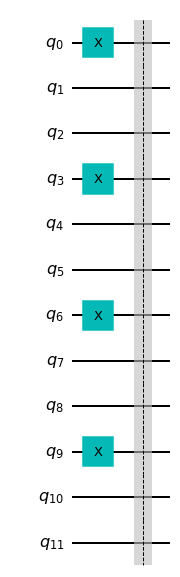

In [150]:
#Stage0
qc.x(index)
qc.barrier()
%matplotlib inline
qc.draw(output = 'mpl')

In [151]:
index2=[]
counter = 0;
for x in range(1,3*n-5,3):
    index2.append(index[counter]+1)
    counter = counter+1
print(index2)

#This index2 array stores control positions of Controlled Ry Gate for Stage 1

[1, 4]


In [152]:
import math
from sympy import *

In [153]:

pi = math.pi


In [155]:
#On computing the limit for V30/V10 we get 81
#thus
t=math.sqrt(81)
print(t)

9.0


In [156]:
# def phi(k):
#     if(k== n-1):
#         return math.atan(-t)
#     return math.atan(-t* cos(phi(k+1)))

#The above method is recursion implementation of below process
#The below process is chosen for faster computation
phi = []
phi_next_value = math.atan(-t)
for x in reversed(range(n)):
    phi.insert(0,phi_next_value)
    phi_next_value = math.atan(-t*cos(phi_next_value))



In [157]:
from qiskit.quantum_info.operators import Operator

In [158]:
#Function to create a custom CZ Gate as stated in the research paper
def new_CZGate(angle):
    inner_circuit = QuantumCircuit(2, name='CZ(-2Φ/π)')
    alpha = -2*angle;
    exp_value = complex(math.cos(alpha),math.sin(alpha))
    cz_angle = Operator([
        [1,0,0,0],
        [0,1,0,0],
        [0,0,1,0],
        [0,0,0,exp_value]
    ])
    inner_circuit.unitary(cz_angle,[0,1])
    CZ_gate_custom = inner_circuit.to_instruction() #converting the circuit to a gate
    return CZ_gate_custom

In [159]:
#Function to create the custom Controlled Ry Gate as stated in the research paper

def controlled_RyGate(index):
    custom_circuit = QuantumCircuit(2, name = 'Ry (-2Φ' + str(index) + ')')
    custom_circuit.x(0)
    #custom_circuit.SXGate(1)
    sqrtx = Operator([
        [1/2.+1/2.j, 1/2.-1/2.j],
        [1/2.-1/2.j, 1/2.+1/2.j]
    ])
    custom_circuit.unitary(sqrtx,1, label = 'X^(1/2)')
    newCZGate = new_CZGate(phi[index])
    custom_circuit.append(newCZGate,[0,1])
    custom_circuit.rz(2*phi[index],0)

    inverse_sqrtx = Operator([
        [1/2.-1/2.j , 1/2.+1/2.j],
        [1/2.+1/2.j , 1/2.-1/2.j]
    ])
    custom_circuit.unitary(inverse_sqrtx,1,label = 'X^(-1/2)')
    custom_circuit.x(0)
    CRYGate = custom_circuit.decompose().to_gate() #converting the curcuit to a gate
    return CRYGate

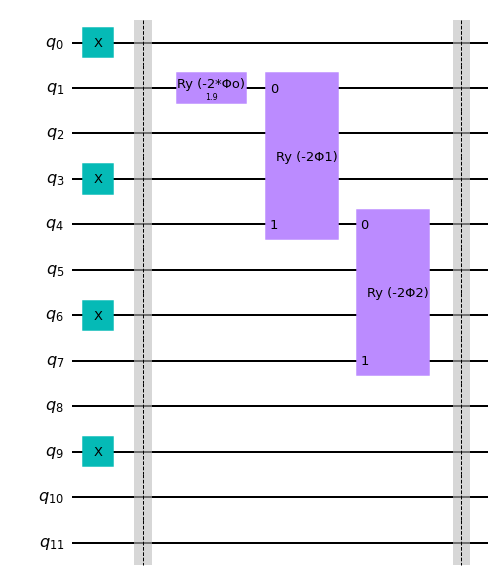

In [160]:
#Stage1
counter=0;
qc.ry(-2*phi[counter],[1], label = 'Ry (-2*Φo)')
counter=counter+1
for x in index2:
    CRYGate = controlled_RyGate(counter)
    qc.append(CRYGate, [x,x+3])
    counter = counter+1

qc.barrier()
qc.draw(output = 'mpl')

In [161]:
length = len(index2)
index2.append(index2[length-1]+3)
print(index2)
#modifying index2 to store the positions required for Stage2

[1, 4, 7]


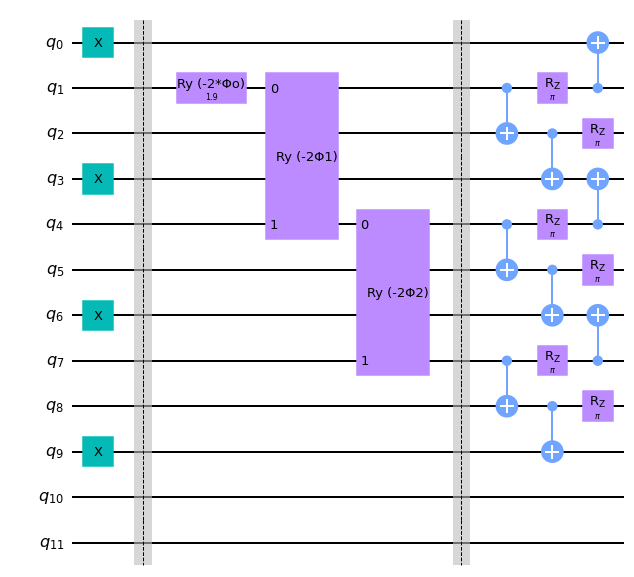

In [162]:
for x in index2:
    qc.cx(x,x+1)
    qc.rz(pi,x)
    qc.cx(x+1,x+2)
    qc.cx(x,x-1)
    qc.rz(pi,x+1)
qc.draw(output = 'mpl')